<a href="https://colab.research.google.com/github/talorsabatani/machine-learning/blob/main/HW2_xor_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

In [ ]:
dim = 2
# num_hidden = 1
num_outputs = 1
# l_rate1 = 0.01
# l_rate2 = 0.1
max_epocs = 40000 
stop_min_loss = 0.2
loss_not_improve_for = 10
epocs_loss_min_adv = 0.0001
num_of_times_per_exp = 10
Temp = 0.1
ShortCut = True
if ShortCut:
    num_hbridge = num_hidden + dim
else:
    num_hbridge = num_hidden

x_train = tf.convert_to_tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=tf.float32)
y_train = tf.convert_to_tensor([[0], [1], [1], [0] , dtype=tf.float32)
x_valid = tf.convert_to_tensor([[0, 0], [0, 1], [1, 0], [1, 1] , [1, 0.1], [1, 0.9], [0.9, 0.9], [0.1, 0.9]], dtype=tf.float32)
y_valid = tf.convert_to_tensor([[0], [1], [1], [0] , [1], [0], [0], [1], dtype=tf.float32)

In [ ]:
@tf.function
def BTU_layer(x, w, b):    
  z = tf.matmul(x, w) + b
  return tf.nn.sigmoid(z / Temp) 

In [ ]:
class XOR_Net_Model:
  def __init__(self, ShortCut=False):
    self.w1 = tf.Variable(tf.random.uniform([dim, num_hidden], -1, 1, seed=0), name="weights1", trainable=True)
    self.w2 = tf.Variable(tf.random.uniform([num_hbridge, num_outputs], -1, 1, seed=0), name="weights2", trainable=True)
    self.b1 = tf.Variable(tf.zeros([num_hidden]), name="bias1", trainable=True)
    self.b2 = tf.Variable(tf.zeros([num_outputs]), name="bias2", trainable=True)
    self.ShortCut = ShortCut
    
  # feed forward
  def __call__(self, x_train):
    self.hlayer1 = BTU_layer(x_train, self.w1, self.b1)
    if self.ShortCut:
        self.hlayer1 = tf.concat([self.hlayer1, x_train], 1)
    self.out = BTU_layer(self.hlayer1, self.w2, self.b2)
    return self.out

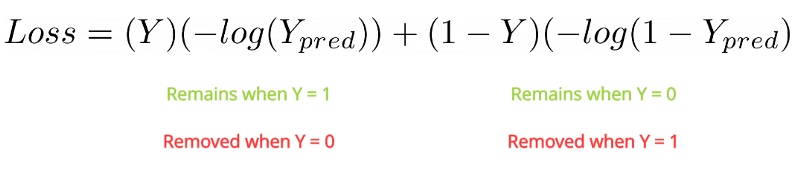

In [ ]:
# compute loss on feed forward step
def Loss(out, y_train):
  return -tf.reduce_sum(y_train * tf.math.log(out) + (1.0 - t_train) * tf.math.log(1.0 - out))  # Cross Entropy loss function

# compute grads for back propagation
def grad(model, x_train, y_train):
  with tf.GradientTape() as t:
    loss = Loss(model(x_train), y_train)
  return t.gradient(loss, [model.w1, model.b1, model.w2, model.b2]), loss

In [ ]:
# 1 train step operation
def train(model, x_train, y_train, optimizer):
  grads, loss = grad(model, x_train, y_train)
  optimizer.apply_gradients(zip(grads, [model.w1, model.b1, model.w2, model.b2]))
  return loss

In [ ]:
# # define a model:
# model = XOR_Net_Model(ShortCut=ShortCut)
# # set an optimizer:
# optimizer = tf.compat.v1.train.GradientDescentOptimizer(l_rate)

In [ ]:
# # run training:
# for i in range(num_epocs):
#   train_loss = train(model, x_train, y_train, optimizer)
#   if i % 100 == 0:
#     print("\n Epoc: %s, loss: %s" % (i, train_loss))
#     print(model(x_train))


 Epoc: 0, loss: tf.Tensor(7.2320433, shape=(), dtype=float32)
tf.Tensor(
[[0.11531112]
 [0.91972667]
 [0.0343248 ]
 [0.93613195]], shape=(4, 1), dtype=float32)

 Epoc: 100, loss: tf.Tensor(0.39090753, shape=(), dtype=float32)
tf.Tensor(
[[0.06840408]
 [0.87859976]
 [0.92165107]
 [0.09972158]], shape=(4, 1), dtype=float32)

 Epoc: 200, loss: tf.Tensor(0.18843801, shape=(), dtype=float32)
tf.Tensor(
[[0.03379479]
 [0.93946874]
 [0.96109855]
 [0.0496667 ]], shape=(4, 1), dtype=float32)

 Epoc: 300, loss: tf.Tensor(0.12244514, shape=(), dtype=float32)
tf.Tensor(
[[0.02212059]
 [0.96021265]
 [0.9744698 ]
 [0.03263786]], shape=(4, 1), dtype=float32)

 Epoc: 400, loss: tf.Tensor(0.090304606, shape=(), dtype=float32)
tf.Tensor(
[[0.01636821]
 [0.97048724]
 [0.98107934]
 [0.02420649]], shape=(4, 1), dtype=float32)

 Epoc: 500, loss: tf.Tensor(0.071398005, shape=(), dtype=float32)
tf.Tensor(
[[0.01296496]
 [0.9765855 ]
 [0.98499775]
 [0.01920289]], shape=(4, 1), dtype=float32)

 Epoc: 600, loss

In [ ]:
# define test step operation:
def test(model, x_test, t_test):
  loss = Loss(model(x_test), t_test)
  return loss

In [ ]:
# Evaluate test accuracy
x_test = x_train # dummy train set
t_test = y_train
test_loss = test(model, x_test, t_test)
print("Loss: %s \n out: %s" % (test_loss, model(x_train)))

Loss: tf.Tensor(0.01701141, shape=(), dtype=float32) 
 out: tf.Tensor(
[[0.00310335]
 [0.994359  ]
 [0.99639475]
 [0.0046238 ]], shape=(4, 1), dtype=float32)


the format of the struct to save the data on every training session  
experiment: number of experiments, hidden: number of hidden nodes, LR: learning rate, Bridge: is there a bridge

In [ ]:
def saving_format(experiment, hidden, LR, ShortCut):
    form = dict()

    # system values
    form["experiment"] = experiment
    form["hidden"] = hidden
    form["LR"] = LR
    form["Bridge"] = Bridge

    # training values
    form["meanepocs"] = 0
    form["std/epocs%"] = 0
    form["Failures"] = 0
    form["meanvalidloss"] = 0
    form["stdvalidlossPercent"] = 0
    form["meanTrainLoss"] = 0
    form["stdTrainLossPercent"] = 0

    # for hidden=1 only
    form["out_node_arr"] = []
    form["in_nodes"] = []

    return form

# **Experiment**

Experiment 1:  
*   Learning_rate = 0.1
*   hidden = 2
*   without bridge






In [ ]:
form = saving_format(1, 2, 0.1, False)
model1 = XOR_Net_Model(ShortCut=ShortCut)
optimizer = tf.compat.v1.train.GradientDescentOptimizer(0.1)
form = train_net_GD(tx, ty, vx, vy, form)

In [ ]:
j = 0
loss_t = 0
loss_v = 0
epoc = 0
count = 0
prev_v_loss = 0

In [ ]:
while j < num_of_times_per_exp:
    # run training:
    for i in range(max_epocs):
      train_loss = train(model1, x_train, y_train, optimizer)
      if i % 100 == 0:
        print("\n Epoc: %s, loss: %s" % (i, train_loss))
        print(model(x_train))

Experiment 2:  
*   Learning_rate = 0.1
*   hidden = 2
*   with bridge






In [ ]:
form = saving_format(2, 2, 0.1, True)

Experiment 3:  
*   Learning_rate = 0.1
*   hidden = 4
*   without bridge






In [ ]:
  form = saving_format(3, 4, 0.1, False)

Experiment 4:  
*   Learning_rate = 0.1
*   hidden = 4
*   with bridge






In [ ]:
form = saving_format(5, 4, 0.1, True)

Experiment 5:  
*   Learning_rate = 0.01
*   hidden = 2
*   without bridge






In [ ]:
form = saving_format(5, 2, 0.01, False)

Experiment 6:  
*   Learning_rate = 0.01
*   hidden = 2
*   with bridge






In [ ]:
form = saving_format(6, 2, 0.01, True)

Experiment 7:  
*   Learning_rate = 0.01
*   hidden = 4
*   without bridge






In [ ]:
form = saving_format(7, 4, 0.01, False)

Experiment 8:  
*   Learning_rate = 0.01
*   hidden = 4
*   with bridge






In [ ]:
form = saving_format(8, 4, 0.01, True)

Experiment 9:  
*   Learning_rate = 0.1
*   hidden = 1
*   with bridge









In [ ]:
  form = saving_format(9, 1, 0.1, True)

Experiment 10:  
*   Learning_rate = 0.01
*   hidden = 1
*   with bridge

In [ ]:
  form = saving_format(10, 1, 0.01, True)